ARIMA(0, 0, 0) MAE=401834.898
ARIMA(0, 0, 1) MAE=228630.263
ARIMA(0, 0, 2) MAE=160214.054
ARIMA(0, 0, 3) MAE=128177.608
ARIMA(0, 0, 4) MAE=114225.802
ARIMA(0, 1, 0) MAE=82347.298
ARIMA(0, 1, 1) MAE=83083.000
ARIMA(0, 1, 2) MAE=78622.499
ARIMA(0, 1, 3) MAE=79107.635
ARIMA(0, 1, 4) MAE=78200.991
ARIMA(0, 2, 0) MAE=117012.082
ARIMA(0, 2, 1) MAE=85009.472
ARIMA(0, 2, 2) MAE=86348.501
ARIMA(0, 2, 3) MAE=79214.735
ARIMA(0, 2, 4) MAE=79552.320
ARIMA(0, 3, 0) MAE=207195.838
ARIMA(0, 3, 1) MAE=117140.037
ARIMA(0, 3, 2) MAE=85018.704
ARIMA(0, 3, 3) MAE=85749.069
ARIMA(0, 3, 4) MAE=79641.253
ARIMA(0, 4, 0) MAE=389444.095
ARIMA(0, 4, 1) MAE=207447.963
ARIMA(0, 4, 2) MAE=119505.437
ARIMA(0, 4, 3) MAE=89535.552
ARIMA(0, 4, 4) MAE=88201.962
ARIMA(1, 0, 0) MAE=82467.315
ARIMA(1, 0, 1) MAE=83151.261
ARIMA(1, 0, 2) MAE=78910.742
ARIMA(1, 0, 3) MAE=78975.276
ARIMA(1, 0, 4) MAE=77922.342
ARIMA(1, 1, 0) MAE=83239.030
ARIMA(1, 1, 1) MAE=81530.430
ARIMA(1, 1, 2) MAE=78263.571
ARIMA(1, 1, 3) MAE=78482.730
ARI

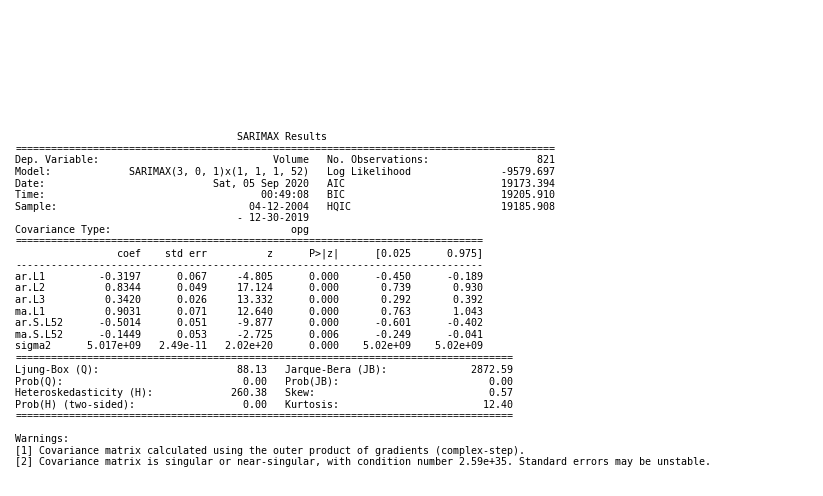

In [1]:
crop_list = ['RASPBERRIES','STRAWBERRIES']

for i in range(0, len(crop_list)):

    crop = crop_list[i]
    import sys
    sys.path.insert(0, '../../src')
    #   https://realpython.com/python-modules-packages/
    sys.path.append('../../src/d01_data')
    sys.path.append('../../src/d02_processing')
    sys.path.append('../../src/d03_modelling')

    import extractions as extract
    import transformations as transf
    import training as train
    import import_data as imp
    import inference as inf
    import time  
    from dateutil.relativedelta import relativedelta
    from datetime import date


    ####################  Train ARIMA volume  ####################

    # Training

    startp = time.time()

    ctry = 'US'
    trade_ctry = 'MX'
    ctgr = 'std'

    #train.
    train.train_arima_model_vols(crop,ctry,trade_ctry,ctgr)

    #################### Inference volumes ####################

    # Inference

    ctry = 'US'
    trade_ctry = 'MX'
    ctgr = 'std'


    regn = ''
    pkge = ''
    crcy = 'USD'
    msre = 'KG'
    mdel = 'ARIMA'

    start = date.today().strftime('%Y-01-01')
    end = (date.today() + relativedelta(years=1)).strftime('%Y-12-31')

    df_pred_vols = inf.get_prediction_vols(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel,start,end)
    #inf.load_predictions_db(df_pred,ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel)

    #################### Inference SARIMAX price (including arima volumes)  ####################

    # Inference

    ctry = 'US'
    trade_ctry = 'MX'
    ctgr = 'std'

    regn = ''
    pkge = ''
    crcy = 'USD'
    msre = 'KG'
    mdel = 'SARIMAX'

    mdel_vols = 'ARIMA'
    df_pred_vols = inf.get_prediction_vols(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel_vols,start,end)
    exog = df_pred_vols[df_pred_vols.Date_ref > date.today().strftime('%Y-01-01')].drop(columns=['Volume']).set_index('Date_ref')

    df_pred = inf.get_prediction(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel,exog,start,end)
    inf.load_predictions_db(df_pred,ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel)

    endp = time.time()
    duration = endp - startp
    minutes = duration // 60
    seconds = duration - (minutes * 60)
    print(f"{minutes} minutes and {seconds} seconds")